In [1]:
import astropy.io.ascii as ascii
import Functions as AC
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [2]:
N=256
i = np.arange(N)
dt=.1
t_i = i*dt
t0=dt*(N//2)
v0=1
sigma0=1.5

In [35]:
def f(t):
    return np.cos(2*np.pi*v0*(t-t0))

def g(t):
    return np.exp(-(t-t0)**2/(2*sigma0**2))

def Psi(t):
    return 1/(np.sqrt(2*np.pi)*sigma0) * f(t) * g(t)

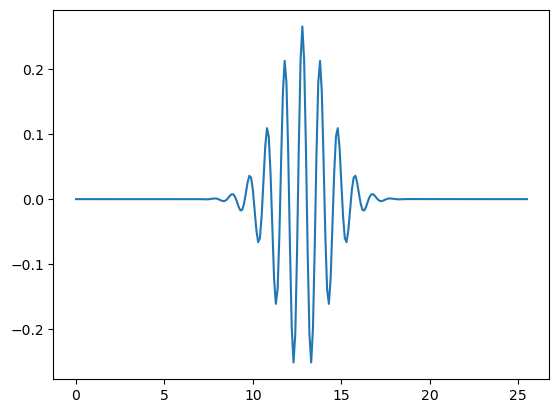

In [4]:
plt.plot(t_i, Psi(t_i))

In [5]:
Psinu=np.fft.fft(np.roll(Psi(t_i), shift=N//2))
nu=np.fft.fftfreq(N,d=dt)

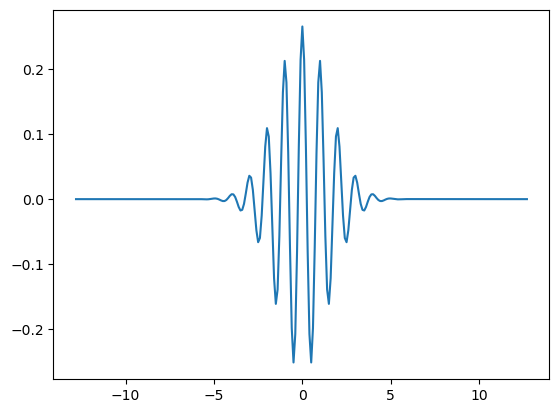

In [6]:
plt.plot(t_i-t0, Psi(t_i))


c:\Users\casey\.conda\envs\masterfall\Lib\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\casey\.conda\envs\masterfall\Lib\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


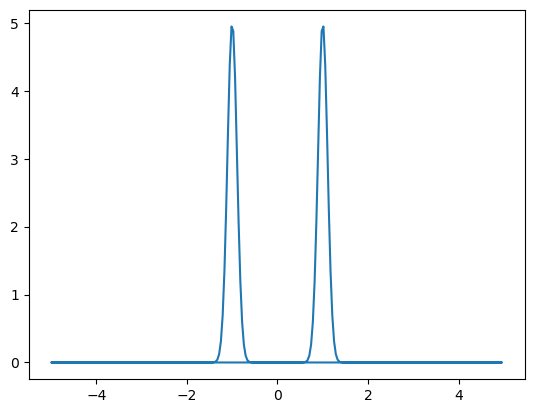

In [7]:
plt.plot(nu, Psinu)

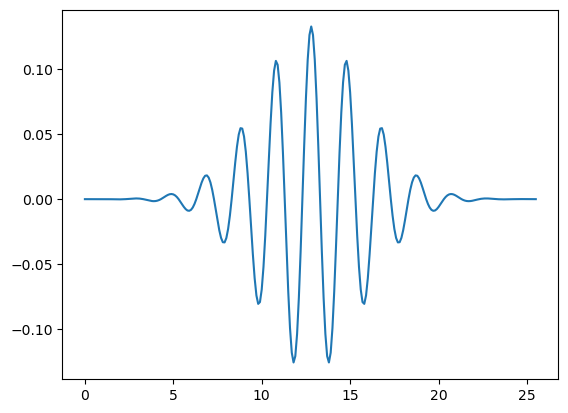

In [8]:
N=256
i = np.arange(N)
dt=.1
t_i = i*dt
t0=dt*(N//2)
v0=.5
sigma0=3

plt.plot(t_i, Psi(t_i))


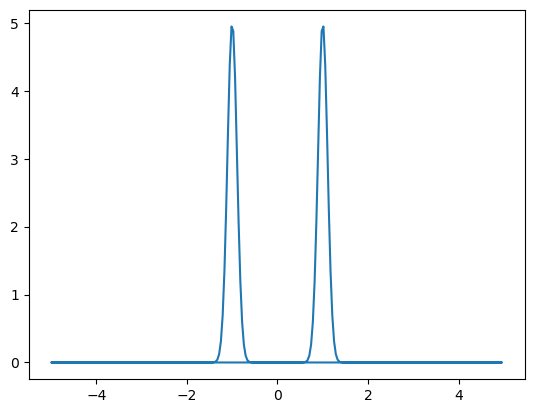

In [9]:
plt.plot(nu, Psinu)

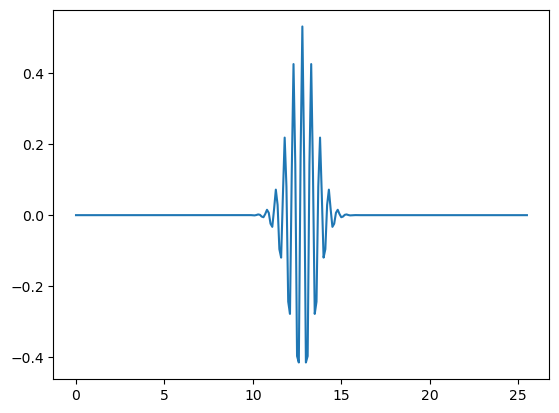

In [10]:
N=256
i = np.arange(N)
dt=.1
t_i = i*dt
t0=dt*(N//2)
v0=2
sigma0=.75

plt.plot(t_i, Psi(t_i))


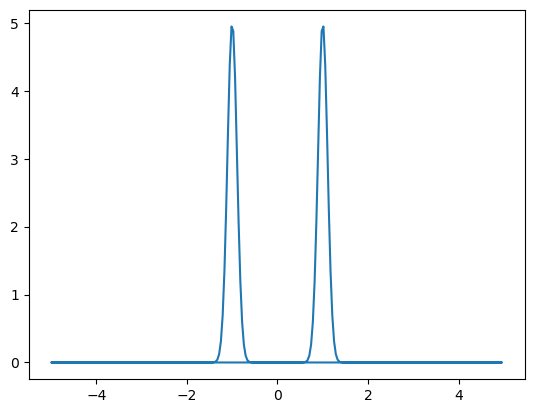

In [11]:
plt.plot(nu, Psinu)

In [45]:
N=256
i = np.arange(N)
dt=.1
t_i = i*dt
t0=dt*(N//2)
v0=1
sigma0=1.5
M=100
n = np.random.normal(0,0.02,size=(N,M))
psit_n = Psi(t_i)[:,np.newaxis]+n

Psinu_n=np.fft.fft(np.roll(psit_n, shift=(N//2,0)), axis=0)
nu=np.fft.fftfreq(N,d=dt)



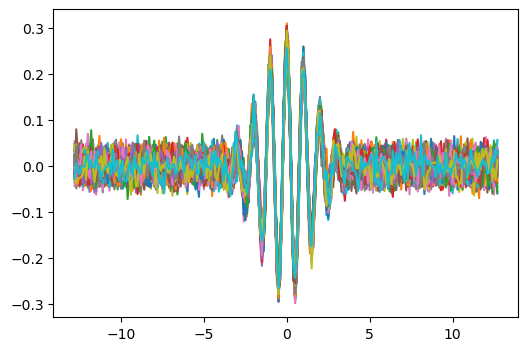

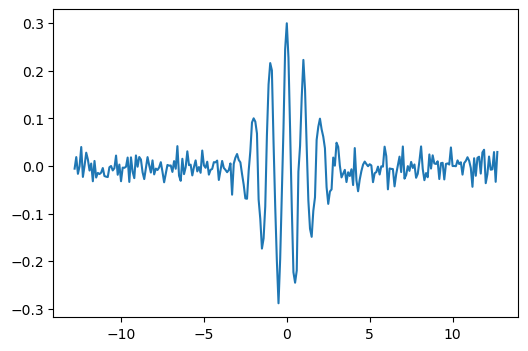

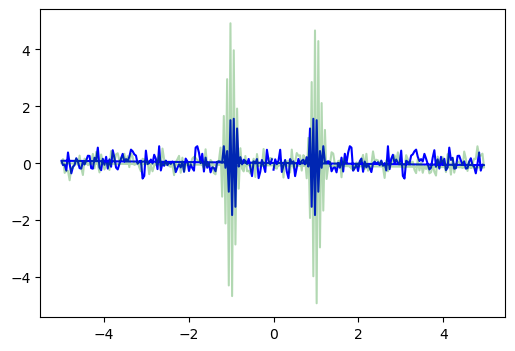

In [52]:
plt.subplots(figsize=(6, 4))
plt.plot(t_i-t0, psit_n)
plt.subplots(figsize=(6, 4))
plt.plot(t_i-t0, psit_n[:,10])
plt.subplots(figsize=(6, 4))
plt.plot(nu, np.real(Psinu_n[:,10]), color='b')
plt.plot(nu, np.imag(Psinu_n[:,10]), color='g', alpha=.3)

In [53]:
Psinu_star = np.conj(Psinu_n)

In [54]:
Power_spectrum = Psinu_n*Psinu_star

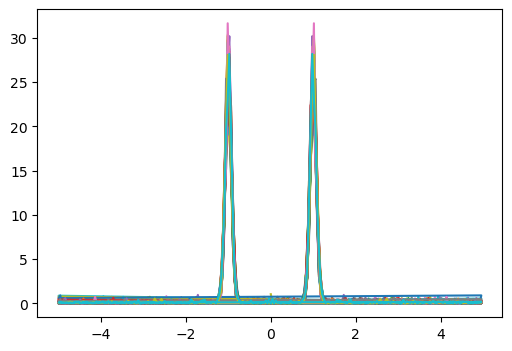

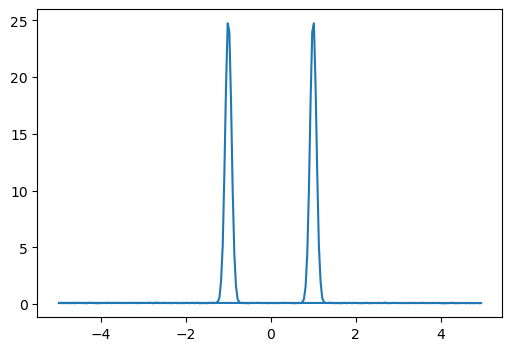

In [60]:
plt.subplots(figsize=(6, 4))
plt.plot(nu, Power_spectrum)
plt.subplots(figsize=(6, 4))
plt.plot(nu, np.mean(Power_spectrum,axis=1))